In [1]:
# To enable autcomplete
%config IPCompleter.greedy=True

In [2]:
import datetime # to get current date and time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from twitterscraper import query_tweets_from_user

%matplotlib inline

# Raw state csv pulled from New York Times Github
url1 = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
states= pd.read_csv(url1)

# Raw county csv pulled from New York Times Github
url2 = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
county = pd.read_csv(url2)

INFO: {'User-Agent': 'Mozilla/5.0 (Windows NT 5.2; RW; rv:7.0a1) Gecko/20091211 SeaMonkey/9.23a1pre'}


In [3]:
states

date          state  fips  cases  deaths
0     2020-01-21     Washington    53      1       0
1     2020-01-22     Washington    53      1       0
2     2020-01-23     Washington    53      1       0
3     2020-01-24       Illinois    17      1       0
4     2020-01-24     Washington    53      1       0
...          ...            ...   ...    ...     ...
2979  2020-04-25       Virginia    51  12366     436
2980  2020-04-25     Washington    53  13484     743
2981  2020-04-25  West Virginia    54   1025      33
2982  2020-04-25      Wisconsin    55   5687     266
2983  2020-04-25        Wyoming    56    362       7

[2984 rows x 5 columns]

In [4]:
# Isolate state data for New Jersey

# loc isolates data based on labels, save as new dataframe
nj = states.loc[states['state'] == "New Jersey"]
nj

date       state  fips   cases  deaths
292   2020-03-04  New Jersey    34       1       0
312   2020-03-05  New Jersey    34       2       0
337   2020-03-06  New Jersey    34       4       0
368   2020-03-07  New Jersey    34       4       0
403   2020-03-08  New Jersey    34       6       0
439   2020-03-09  New Jersey    34      11       0
477   2020-03-10  New Jersey    34      15       1
519   2020-03-11  New Jersey    34      23       1
566   2020-03-12  New Jersey    34      29       1
616   2020-03-13  New Jersey    34      50       1
667   2020-03-14  New Jersey    34      75       2
720   2020-03-15  New Jersey    34      98       2
773   2020-03-16  New Jersey    34     176       3
826   2020-03-17  New Jersey    34     268       3
880   2020-03-18  New Jersey    34     427       5
934   2020-03-19  New Jersey    34     735       9
988   2020-03-20  New Jersey    34     896      11
1042  2020-03-21  New Jersey    34    1336      16
1096  2020-03-22  New Jersey    34    1914      20
1150  2020-03-23  New Jersey    34    2844      27
1204  2020-03-24  New Jersey    34    3675      44
1258  2020-03-25  New Jersey    34    4402      62
1312  2020-03-26  New Jersey    34    6876      81
1366  2020-03-27  New Jersey    34    8825     108
1420  2020-03-28  New Jersey    34   11124     140
1475  2020-03-29  New Jersey    34   13386     161
1530  2020-03-30  New Jersey    34   16636     199
1585  2020-03-31  New Jersey    34   18696     267
1640  2020-04-01  New Jersey    34   22255     355
1695  2020-04-02  New Jersey    34   25590     539
1750  2020-04-03  New Jersey    34   29895     647
1805  2020-04-04  New Jersey    34   34124     847
1860  2020-04-05  New Jersey    34   37505     917
1915  2020-04-06  New Jersey    34   41090    1005
1970  2020-04-07  New Jersey    34   44416    1232
2025  2020-04-08  New Jersey    34   47437    1504
2080  2020-04-09  New Jersey    34   51027    1700
2135  2020-04-10  New Jersey    34   54588    1932
2190  2020-04-11  New Jersey    34   58151    2183
2245  2020-04-12  New Jersey    34   61850    2350
2300  2020-04-13  New Jersey    34   64584    2443
2355  2020-04-14  New Jersey    34   68824    2805
2410  2020-04-15  New Jersey    34   71030    3156
2465  2020-04-16  New Jersey    34   75317    3518
2520  2020-04-17  New Jersey    34   78467    3840
2575  2020-04-18  New Jersey    34   81420    4070
2630  2020-04-19  New Jersey    34   85301    4202
2685  2020-04-20  New Jersey    34   88806    4377
2740  2020-04-21  New Jersey    34   92387    4753
2795  2020-04-22  New Jersey    34   95865    5063
2850  2020-04-23  New Jersey    34   99989    5368
2905  2020-04-24  New Jersey    34  102196    5617
2960  2020-04-25  New Jersey    34  105523    5863

In [5]:
# Determine days of outbreak

totalDays = nj.shape[0] # get number of rows containing NJ
njLength = np.linspace(1,totalDays,totalDays)
njCases = np.array(nj["cases"])

In [6]:
# Get current date and time

# now method returns date and time
now = datetime.datetime.now()
# I returns hour in 12 hour format, p returns AM or PM based on time
dateAndTime = now.strftime("%m/%d/%Y %I:%M %p")

In [7]:
# Get last date of available data
recentDate = county.at[county.index[-1], 'date']

# Isolate NJ Counties for given date
njCountyList = county[(county['state'] == "New Jersey") & (county["date"] == recentDate)]

njCountyList

date      county       state     fips  cases  deaths
88544  2020-04-25    Atlantic  New Jersey  34001.0    596      29
88545  2020-04-25      Bergen  New Jersey  34003.0  14738     954
88546  2020-04-25  Burlington  New Jersey  34005.0   2153      88
88547  2020-04-25      Camden  New Jersey  34007.0   2870     118
88548  2020-04-25    Cape May  New Jersey  34009.0    261      18
88549  2020-04-25  Cumberland  New Jersey  34011.0    504       6
88550  2020-04-25       Essex  New Jersey  34013.0  12520    1019
88551  2020-04-25  Gloucester  New Jersey  34015.0    949      30
88552  2020-04-25      Hudson  New Jersey  34017.0  13367     655
88553  2020-04-25   Hunterdon  New Jersey  34019.0    505      23
88554  2020-04-25      Mercer  New Jersey  34021.0   3245     183
88555  2020-04-25   Middlesex  New Jersey  34023.0  10075     431
88556  2020-04-25    Monmouth  New Jersey  34025.0   5521     287
88557  2020-04-25      Morris  New Jersey  34027.0   4821     347
88558  2020-04-25       Ocean  New Jersey  34029.0   5811     317
88559  2020-04-25     Passaic  New Jersey  34031.0  10738     416
88560  2020-04-25       Salem  New Jersey  34033.0    177       6
88561  2020-04-25    Somerset  New Jersey  34035.0   3030     219
88562  2020-04-25      Sussex  New Jersey  34037.0    812      91
88563  2020-04-25       Union  New Jersey  34039.0  11523     563
88564  2020-04-25     Unknown  New Jersey      NaN    557       0
88565  2020-04-25      Warren  New Jersey  34041.0    750      63

last updated at: 04/26/2020 03:53 PM


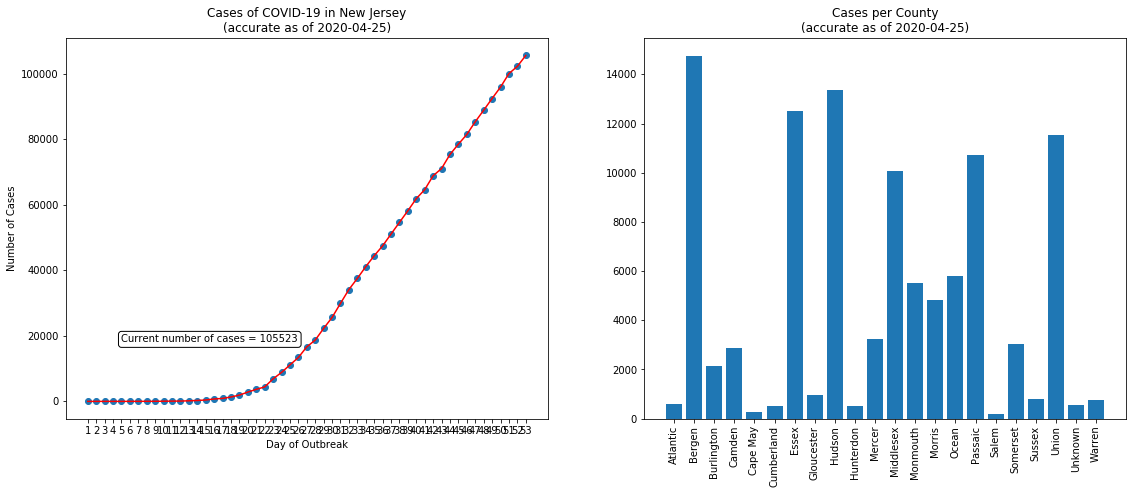

In [8]:

# Create figure object with two subplots oriented horizontally

figure, (sc, ba) = plt.subplots(1,2, figsize=(19,7))

# Plot NJ cases vs time

sc.scatter(njLength, njCases)
sc.plot(njLength, njCases, color = 'r')
sTitle = "Cases of COVID-19 in New Jersey\n(accurate as of " + recentDate + ")"
sc.set_title(sTitle)
sc.set_xlabel("Day of Outbreak")
sc.set_ylabel("Number of Cases")

# adjust ticks to show all days
xticks = np.arange(1,njLength.max()+1,1)
sc.set_xticks(xticks); # semicolon suppresses output of this function

# Create box label
labelText = "Current number of cases = " + str(njCases.max())
box = dict(boxstyle = 'round', facecolor = 'white')
sc.text(5, 18000,labelText,bbox=box);

# Plot cases per county

ba.bar(njCountyList['county'], njCountyList['cases'] )

bTitle = "Cases per County\n(accurate as of " + recentDate + ")"
ba.set_xticklabels(njCountyList['county'], rotation = 90);
ba.set_title(bTitle);

print("last updated at: {}".format(dateAndTime))

last updated at: 04/26/2020 03:53 PM


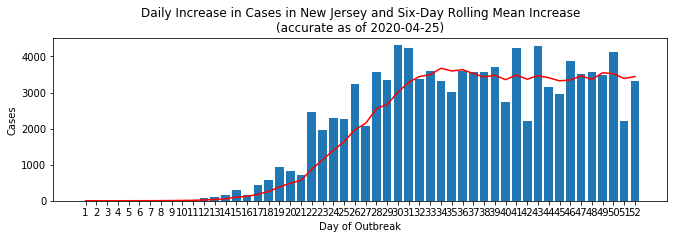

In [9]:
# Create list of the increase in cases between each day and rate of change

newCases = []

for i in range(0, len(njCases)-1):
    newCases.append(njCases[i+1]-njCases[i]) # subtract current number of cases by previous number

newCases = np.array(newCases) # convert case number list to array

numDaysExceptLast = len(njLength) # need to remove last day from list

newCaseDays = np.arange(1, numDaysExceptLast) # convert day list to array

ticks = np.arange(1,newCaseDays.max()+1,1); #generate x ticks

fig= plt.figure(figsize=(11,3)) # create figure

axes = fig.add_subplot() # automatically adds axis (graph) in default position
axes.bar(newCaseDays, newCases.transpose())
axes.set_title("Daily Increase in Cases in New Jersey and Six-Day Rolling Mean Increase\n(accurate as of "
               + recentDate + ")");
axes.set_xticks(ticks);
axes.set_xlabel("Day of Outbreak");
axes.set_ylabel("Cases");
print("last updated at: {}".format(dateAndTime))

'''
Adding line tracing 6 day rolling average increase in cases

Because data can be unreliable at any given day, a rolling average allows for 
visualization of trends over a longer period of time, which is more reliable.

At each day in the tracker, the mean is taken of the daily increases over the previous 6 days. 
For days 1-6, there are not 6 days worth of data, so the average is taken with all days up until that point.
After day 6, the starting variable increases by 1 to trail 6 days behind the current day's data, leaving 6 days in
between to calculate the average.
'''
meanCaseIncrease = []

sixDayStart = 0
for i in range(len(newCases)):
    if i > 6: # trail by 6 days once 6 days of data are available. Change number to alter number of days for average
        sixDayStart+=1
    # mean of previous 6 days, i+1 to avoid taking mean of empty space after last day of data
    meanCaseIncrease.append(np.mean(newCases[sixDayStart:i+1])); 
    
plt.plot(newCaseDays, meanCaseIncrease, color = 'r');

COVID-19 Hospitalizations in New Jersey:<br>Unlike case numbers, there is no direct source for all of the hospitalizations in New Jersey. However, the Governor of New Jersey started reporting hospitalizations almost every day (with some exceptions) from April 9th on his Twitter account, @GovMurphy. While the data from this account is incomplete, it is the only place reporting these values. The following code scrapes Twitter for the governor's tweets relating to hospitalization rates, parses each tweet for the correct number of hospitalizations, and then plots the values.

In [10]:
'''
The following lines search for tweets by the query in the quotes. This was used in previous versions of this script but has
been replaced by searching directly by username.

# Create Date Objects for start and end of data
startDate = datetime.date(2020, 4, 8)
endDate = datetime.date.today() + datetime.timedelta(days=1) # have to use tomorrow's date to include tweets from today
print(startDate)
print(endDate)
limit = 10000 # max number of tweets that will be grabbed
lang = 'english'
#username = GovMurphy
tweets = query_tweets("Phil Murphy", begindate = startDate, enddate = endDate, limit = limit, lang = lang)
'''
# scrape all tweets from this user
tweet = query_tweets_from_user("GovMurphy")

INFO: Scraping tweets from https://twitter.com/GovMurphy
INFO: Using proxy 51.158.119.88:8811
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1254097458881323009&reset_error_state=false
INFO: Using proxy 203.19.88.59:80
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1254050421099937793&reset_error_state=false
INFO: Using proxy 186.46.222.226:59765
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1253769135294685186&reset_error_state=false
INFO: Using proxy 170.81.232.41:55302
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1253764238583181312&reset_error_state=false
INFO: Using proxy 4

INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1247234736302575616&reset_error_state=false
INFO: Using proxy 191.252.100.178:80
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1247229448958730240&reset_error_state=false
INFO: Using proxy 200.33.152.207:45226
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1246848590888173569&reset_error_state=false
INFO: Using proxy 170.254.150.166:80
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1246494344787439617&reset_error_state=false
INFO: Using proxy 80.187.140.26:8080
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/t

In [11]:
# convert tweet data to pandas dataframe
tweetData = pd.DataFrame(t.__dict__ for t in tweet)
tweetData

screen_name              username             user_id  \
0    Rick_Pescatore    Rick Pescatore, DO           466856651   
1      MeetThePress        Meet the Press            11856892   
2         GovMurphy  Governor Phil Murphy  948946378939609089   
3         GovMurphy  Governor Phil Murphy  948946378939609089   
4      MeetThePress        Meet the Press            11856892   
..              ...                   ...                 ...   
647       GovMurphy  Governor Phil Murphy  948946378939609089   
648       GovMurphy  Governor Phil Murphy  948946378939609089   
649       GovMurphy  Governor Phil Murphy  948946378939609089   
650       GovMurphy  Governor Phil Murphy  948946378939609089   
651       GovMurphy  Governor Phil Murphy  948946378939609089   

                tweet_id                                   tweet_url  \
0    1254468096288571394  /Rick_Pescatore/status/1254468096288571394   
1    1254432562027606016    /MeetThePress/status/1254432562027606016   
2    1254441827371036672       /GovMurphy/status/1254441827371036672   
3    1254435650490810368       /GovMurphy/status/1254435650490810368   
4    1254403115954176001    /MeetThePress/status/1254403115954176001   
..                   ...                                         ...   
647  1246125910451007488       /GovMurphy/status/1246125910451007488   
648  1246125256730914822       /GovMurphy/status/1246125256730914822   
649  1246124312622440449       /GovMurphy/status/1246124312622440449   
650  1246123815333171206       /GovMurphy/status/1246123815333171206   
651  1246123302113992704       /GovMurphy/status/1246123302113992704   

              timestamp  timestamp_epochs  \
0   2020-04-26 17:51:15        1587923475   
1   2020-04-26 15:30:03        1587915003   
2   2020-04-26 16:06:52        1587917212   
3   2020-04-26 15:42:20        1587915740   
4   2020-04-26 13:33:03        1587907983   
..                  ...               ...   
647 2020-04-03 17:22:23        1585934543   
648 2020-04-03 17:19:47        1585934387   
649 2020-04-03 17:16:02        1585934162   
650 2020-04-03 17:14:04        1585934044   
651 2020-04-03 17:12:01        1585933921   

                                                  text  \
0    Understanding regional heterogeneity and lever...   
1    . @GovMurphy said they haven't decided if they...   
2    NEW: NJ has 3,730 new confirmed positive cases...   
3    Our @BergenCC testing site is STILL OPEN today...   
4    .@GovMurphy responds to Senate Majority Leader...   
..                                                 ...   
647  Yesterday I spoke with Dr. Anthony Fauci. He w...   
648  We’re still asking for volunteers with prior m...   
649  TESTING INFO:\n•@PNCArtsCenter drive-through s...   
650  There is no silver bullet we can load to make ...   
651  I know I sound like a broken record on this, b...   

                                             text_html  \
0    <p class="TweetTextSize TweetTextSize--normal ...   
1    <p class="TweetTextSize TweetTextSize--normal ...   
2    <p class="TweetTextSize TweetTextSize--normal ...   
3    <p class="TweetTextSize TweetTextSize--normal ...   
4    <p class="TweetTextSize TweetTextSize--normal ...   
..                                                 ...   
647  <p class="TweetTextSize TweetTextSize--normal ...   
648  <p class="TweetTextSize TweetTextSize--normal ...   
649  <p class="TweetTextSize TweetTextSize--normal ...   
650  <p class="TweetTextSize TweetTextSize--normal ...   
651  <p class="TweetTextSize TweetTextSize--normal ...   

                                                 links  ... has_media  \
0    [https://twitter.com/meetthepress/status/12544...  ...     False   
1                                                   []  ...     False   
2                                                   []  ...     False   
3                      [http://covid19.nj.gov/testing]  ...     False   
4                                                   []  ...   

In [12]:
# Isolate all tweets from the GovMurphy account
tweetData = tweetData.loc[tweetData['username'] == "Governor Phil Murphy"]

# sort from earliest to most recent
tweetData = tweetData.sort_values(by=['timestamp_epochs']) # timestamp_epochs store number that increases with each tweet

# reset indices of all dataframe values after sorting
tweetText = tweetData.reset_index()

# isolate text from each tweet
tweetText = tweetText['text']
tweetText

0      I know I sound like a broken record on this, b...
1      There is no silver bullet we can load to make ...
2      TESTING INFO:\n•@PNCArtsCenter drive-through s...
3      We’re still asking for volunteers with prior m...
4      Yesterday I spoke with Dr. Anthony Fauci. He w...
                             ...                        
547    We now have 105,523 confirmed #COVID19 cases.\...
548    UPDATE:\nNew #COVID19 cases: 3,457\nTotal case...
549    We’ve lost more New Jerseyans to coronavirus t...
550    Our @BergenCC testing site is STILL OPEN today...
551    NEW: NJ has 3,730 new confirmed positive cases...
Name: text, Length: 552, dtype: object

In [13]:
def hospitalizationExtraction(dataframe, indexOfTweet):

    """
    Parses tweet for the number of hospitalized patients.
    
    Given a dataframe and the index of the tweet in the dataframe, finds where the word 'hospitalized'
    is in that tweet. Then it loops in reverse from that word to the beginning of the tweet until it finds a "word"
    which is a numerical value (the closest number before "hospitalizations" will be the probably be number of 
    hospitalized people, since that is how the sentences are written).
    However, if the first numerical characters are not the correct number, it will keep looking until it finds it.
    It then stores each character of the number in a list, then joins to string, then returns as int
    """
    
    wordsInTweet = dataframe[indexOfTweet].split() # split tweet into list of words
   
    # find index of "hospitalized", trying different splits with punctuation
    
    try:
        hospFound = wordsInTweet.index("hospitalized") # find 'hospitalized'
    except ValueError:
        try: 
            hospFound = wordsInTweet.index("hospitalized.") # find 'hospitalized.''
        except ValueError:
            try: 
                hospFound = wordsInTweet.index("hospitalized,") # find 'hospitalized.' 
            except ValueError:
                try: 
                    hospFound = wordsInTweet.index("hospitals.") # find 'hospitals.' 
                except:
                    return
    
    # loop from "hospitalizations" to the beginning of the list until the correct number is found

    digits = [] # holds list of all digits in the number 
    
    for word in range(hospFound,-1,-1): # loop through words (from -1 to include 0)
        
        for char in wordsInTweet[word]: 
            
            if char.isdigit() or char == "0": 
                digits.append(char)
            elif char == ":": # prevents times in XX:XX format from being included
                digits = []
          
        # if the number has 3 or more digits, it is most likely correct, so break loop
        if len(digits) > 3: 
            break
        # if the number is 2 digits or less, it is probably wrong so disregard these and continue loop
        else: 
            digits = []

    number = ""
    try:
        number = int(number.join(digits)) # combine digits into one string and convert to int
        return number
    except:
        return None # if the tweet is not in the proper format (no valid numbers or otherwise), return none

hospitalizationExtraction(tweetText,5) # test


In [14]:
# generate list of rows from dataframe, tells how many tweets there are to search
hospDayCount = [i for i in range(tweetData.shape[0])]

# return hospitalization numbers from all tweets
hospitalized = [hospitalizationExtraction(tweetText,i) for i in hospDayCount]


# remove none values from invalid tweets
hospitalized = [i for i in hospitalized if i != None]

print(hospitalized)

# adjust count to only include valid tweets
hospDayCount = [i for i in range(1, len(hospitalized)+1)]


print(hospDayCount)

[7363, 7570, 7618, 7781, 8270, 8224, 8011, 7718, 6986, 7594, 7210, 7240, 6847, 6722, 6573]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


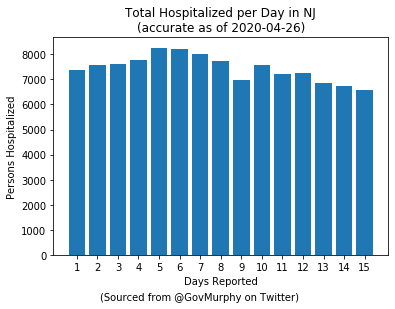

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(hospDayCount,hospitalized)
ax.set_title("Total Hospitalized per Day in NJ\n(accurate as of {})".format(datetime.date.today()))
ax.set_ylabel('Persons Hospitalized')
ax.set_xlabel('Days Reported')
ax.set_xticks(hospDayCount);
ax.text(2.15,-1800,"(Sourced from @GovMurphy on Twitter)");